<a href="https://colab.research.google.com/github/NyasaShaiju/Task-8-Clustering-with-K-Means/blob/main/Task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 8: Clustering with K-Means

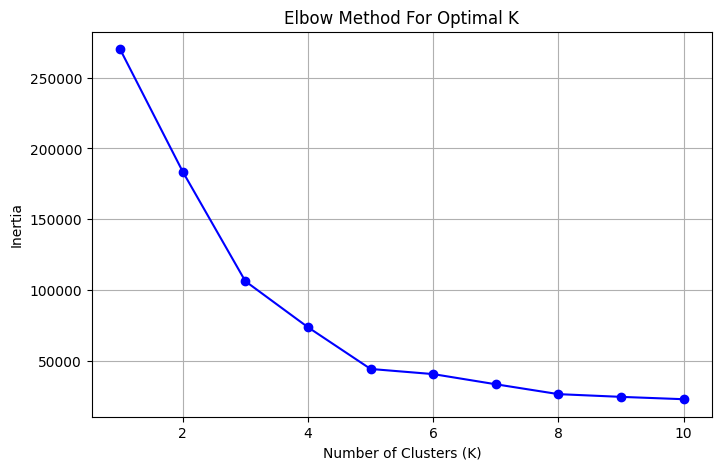

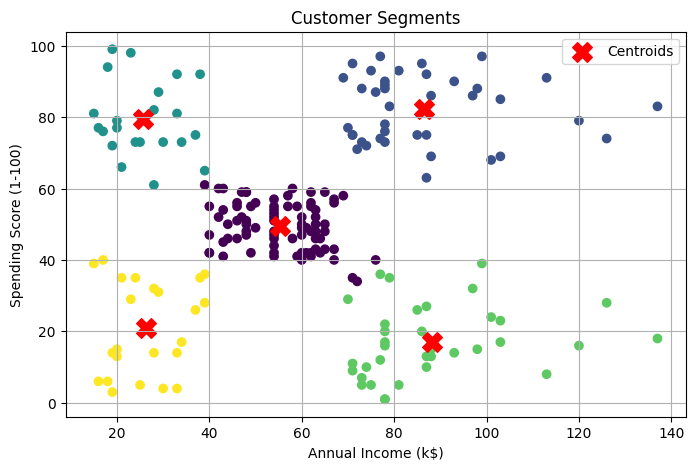

Silhouette Score: 0.553931997444648


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv("/content/Mall_Customers.csv")

X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()


k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X)

plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.legend()
plt.grid(True)
plt.show()


score = silhouette_score(X, clusters)
print("Silhouette Score:", score)
